<h1>Taller 6</h1>

<h2>Ruta más corta</h2>

In [1]:
import math
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
import random as rnd
import time
%matplotlib inline

def FloydWarshall(W):
    n = W.shape[0]
    D_list = []#Save each D^{(k)} matrix
    D_list.append(W[:,:])#D^{(0)}
    for k in range(n):        
        D_k = D_list[k][:,:]
        for i in range(n):
            for j in range(n):
                D_k[i,j] = min(D_list[k][i,j], D_list[k][i,k]+D_list[k][k,j])        
        D_list.append(np.copy(D_k))
    return D_k, D_list

def graphToMatrix(graph):
    gMatx = np.ones((len(graph),len(graph)))*float('inf')

    for node in graph:
        gMatx[graph.keys().index(node),graph.keys().index(node)] = 0
        for neigh in graph[node]:
            gMatx[graph.keys().index(node), graph.keys().index(neigh)] = graph[node][neigh]

    return gMatx

<h3>1. Método para crear grafos aleatorios de $n$ vertices, donde con probabilidad $\psi \in [0,1]$ se define si existe una arista entre cada par de vertices $(i,j)$. El peso $\omega(i,j) \in [minw, maxw]$ se asignará de manera aleatoria uniformemente en el intervalo $[minw, maxw]$</h3>

In [2]:
def randGraph(psi, n, wmin, wmax):

    if psi >1:
        psi=1  #Validación de probabilidades válidas
    if psi <0:
        psi=0
    
    vert = []
    vec = []
    for i in range(n):
        vert.append(chr(65+i))
        vec.append([]) #Creación de vértices y arreglos de vecinos
    
    comp=0
    for a in vec:
        for b in vert:
            x=rnd.randint(1, 10)
            if x<=psi*10 and vert[comp]!=b:
                a.append(b) #Llenado de listas de vecinos
        comp=comp+1
    
    costos = []
    for a in range(len(vec)):
        cost = [rnd.randint(wmin, wmax) for x in xrange(len(vec[a]))] #Agregación de costos
        costos.append(dict(zip(vec[a], cost)))

    return dict(zip(vert, costos))

In [3]:
print randGraph(0.3,5,1,10) #Imprimir grafo con probabilidad de 0.3, 5 vértices y peso entre 1 y 10

{'A': {'C': 3}, 'C': {}, 'B': {}, 'E': {'A': 8}, 'D': {'A': 2}}


<h3>2. Adaptación del algoritmo de Dijkstra para calcular todos los pares de rutas más cortas</h3>

In [4]:
from heapq import heappush, heappop

def updateheap(heap,d,v):
    for i in range(len(heap)):
        if heap[i][1] == v:
            heap[i][0] = d
            fix_minheap(heap,i) # heap=heapify(heap) ineficient      
            break    

def fix_minheap(heap, i):
    if i == 0: return  
    p = int(i/2) #parent  
    if p >= 0 and heap[p][0] > heap[i][0]:
        heap[i], heap[p] = heap[p], heap[i]
        fix_minheap(heap,p)   
            
def Dijkstra(G,start):
        
    D = {} # dictionary of final distances
    for v in G:
        D[v] = float('inf')
    D[start] = 0
    
    P = {} # dictionary of predecessors
    
    Q=[] #  priority queue est.dist. of non-final vert.
    for v in G:
        item = []
        item.append(D[v])
        item.append(v)
        heappush(Q,item)
    
    
    #S = []
    while Q:
        u = heappop(Q)[1]
        #S.append(u)
        for v in G[u]:
            newDuv = D[u] + G[u][v]
            if newDuv < D[v]:
                P[v] = u
                D[v] = newDuv
                updateheap(Q,D[v],v)
    return D,P

def fullDijkstra(G):
    res=[]
    for x in G:
        for y in G:
            d,p = Dijkstra(G,x)
            Path = []
            while 1:
                Path.append(y)
                if y == x: break
                y = p[y]
            Path.reverse()
            res.append(Path)
    return res

In [5]:
g= randGraph(0.7,5,1,10)
print "Grafo:"
print g
print "Rutas:"
print(fullDijkstra(g))

Grafo:
{'A': {'C': 7, 'B': 5, 'E': 3, 'D': 9}, 'C': {'A': 1, 'B': 1, 'E': 1, 'D': 7}, 'B': {'A': 10, 'D': 2}, 'E': {'C': 6, 'B': 3, 'D': 4}, 'D': {'C': 8, 'B': 4, 'E': 5}}
Rutas:
[['A'], ['A', 'C'], ['A', 'B'], ['A', 'E'], ['A', 'E', 'D'], ['C', 'A'], ['C'], ['C', 'B'], ['C', 'E'], ['C', 'B', 'D'], ['B', 'A'], ['B', 'D', 'C'], ['B'], ['B', 'D', 'E'], ['B', 'D'], ['E', 'C', 'A'], ['E', 'C'], ['E', 'B'], ['E'], ['E', 'D'], ['D', 'C', 'A'], ['D', 'C'], ['D', 'B'], ['D', 'E'], ['D']]


<h3>3. Adaptación del algoritmo de Bellman-Ford para calcular todos los pares de rutas más cortas</h3>

In [6]:
def BellmanFord(G,start):
    
    D = {} # dictionary of final distances
    for v in G:
        D[v] = float('inf')
    D[start] = 0
    
    P = {} # dictionary of predecessors
    
    for i in range(len(G)-1):
        for u in G:
            for v in G[u]:   
                newDv = D[u] + G[u][v]
                if newDv < D[v]:
                    P[v] = u
                    D[v] = newDv
    
    for u in G:
        for v in G[u]:   
            newDv = D[u] + G[u][v]
            if newDv < D[v]: print("Negative cicle",u,v)
                
    return D,P

def fullBellmanFord(G):
    res=[]
    for x in G:
        for y in G:
            d,p = BellmanFord(G,x)
            Path = []
            while 1:
                Path.append(y)
                if y == x: break
                y = p[y]
            Path.reverse()
            res.append(Path)
    return res

In [7]:
g= randGraph(0.7,5,1,10)
print "Grafo:"
print g
print "Rutas:"
print(fullBellmanFord(g))

Grafo:
{'A': {'C': 8, 'B': 10, 'E': 2}, 'C': {'A': 3, 'B': 4, 'E': 7, 'D': 7}, 'B': {'C': 10, 'E': 5, 'D': 2}, 'E': {'C': 3, 'B': 9, 'D': 10}, 'D': {'A': 10, 'B': 10}}
Rutas:
[['A'], ['A', 'E', 'C'], ['A', 'E', 'C', 'B'], ['A', 'E'], ['A', 'E', 'C', 'B', 'D'], ['C', 'A'], ['C'], ['C', 'B'], ['C', 'A', 'E'], ['C', 'B', 'D'], ['B', 'E', 'C', 'A'], ['B', 'E', 'C'], ['B'], ['B', 'E'], ['B', 'D'], ['E', 'C', 'A'], ['E', 'C'], ['E', 'C', 'B'], ['E'], ['E', 'C', 'B', 'D'], ['D', 'A'], ['D', 'A', 'E', 'C'], ['D', 'B'], ['D', 'A', 'E'], ['D']]


<h3>4. Implementación del algoritmo de BFS para calcular todos los pares de rutas más cortas (asumiendo que la longitud de la ruta esta dada por la cantidad de aristas que interviene más no por su peso)</h3>

In [8]:
def BFS(graph, start, end):
    q = []
    v = {}
    p = {}
    
    for n in xrange(len(graph)):
        v[n] = False
        p[n] = None
    
    q.append(start)
    while len(q) != 0:
        current = q.pop(0)
        if current == end:
            path = [end]
            while path[-1] != start:
                path.append(p[path[-1]])
            path.reverse()
            if start!=end:
                print start, "-->", end, "saltos:", len(path)-1, "camino:", path
            break
        for neighbor in graph[current]:
            if neighbor not in v:
                v[neighbor] = True
                p[neighbor] = current
                q.append(neighbor)
                
def BFS_2(graph, start, end):
    q = []
    v = {}
    p = {}
    
    for n in xrange(len(graph)):
        v[n] = False
        p[n] = None
    
    q.append(start)
    while len(q) != 0:
        current = q.pop(0)
        if current == end:
            path = [end]
            while path[-1] != start:
                path.append(p[path[-1]])
            path.reverse()
            break
        for neighbor in graph[current]:
            if neighbor not in v:
                v[neighbor] = True
                p[neighbor] = current
                q.append(neighbor)
                
                
def fullBFS(G):
    for x in G:
        for y in G:
            BFS(G,x,y)
            
def fullBFS_2(G):
    for x in G:
        for y in G:
            BFS_2(G,x,y)##esta versión no imprime, solo calcula

In [9]:
g= randGraph(0.4,6,1,10)
print "Grafo:"
print g
print "Rutas:"
fullBFS(g)

Grafo:
{'A': {'C': 7, 'D': 9, 'F': 6}, 'C': {'A': 7, 'E': 9, 'D': 2, 'F': 1}, 'B': {'C': 6, 'E': 6}, 'E': {'D': 10}, 'D': {'A': 2}, 'F': {'C': 2, 'E': 8, 'D': 6}}
Rutas:
A --> C saltos: 1 camino: ['A', 'C']
A --> E saltos: 2 camino: ['A', 'C', 'E']
A --> D saltos: 1 camino: ['A', 'D']
A --> F saltos: 1 camino: ['A', 'F']
C --> A saltos: 1 camino: ['C', 'A']
C --> E saltos: 1 camino: ['C', 'E']
C --> D saltos: 1 camino: ['C', 'D']
C --> F saltos: 1 camino: ['C', 'F']
B --> A saltos: 2 camino: ['B', 'C', 'A']
B --> C saltos: 1 camino: ['B', 'C']
B --> E saltos: 1 camino: ['B', 'E']
B --> D saltos: 2 camino: ['B', 'C', 'D']
B --> F saltos: 2 camino: ['B', 'C', 'F']
E --> A saltos: 2 camino: ['E', 'D', 'A']
E --> C saltos: 3 camino: ['E', 'D', 'A', 'C']
E --> D saltos: 1 camino: ['E', 'D']
E --> F saltos: 3 camino: ['E', 'D', 'A', 'F']
D --> A saltos: 1 camino: ['D', 'A']
D --> C saltos: 2 camino: ['D', 'A', 'C']
D --> E saltos: 3 camino: ['D', 'A', 'C', 'E']
D --> F saltos: 2 camino: ['D'

<h3>5. Comparación experimental de los algoritmos incluyendo Floyd-Warshall para grafos aleatorios densos ($\psi$ cercano a 1) variando linealmente los tamaños de $n$</h3>

In [10]:
def comp_densos(n):
    Dijsktra = []
    Bellman = []
    Floyd = []
    Bfs = []
    for i in range(4,n+4):

        g = randGraph(0.85,i,1,10)       #Se asumen grafos densos aquellos con un 85% de aristas
        
        tic = time.clock()
        fullDijkstra(g)
        toc = time.clock()
        Dijsktra.append(toc - tic)
        
        tic = time.clock()
        fullBellmanFord(g)
        toc = time.clock()
        Bellman.append(toc - tic)
        
        tic = time.clock()
        FloydWarshall(graphToMatrix(g))
        toc = time.clock()
        Floyd.append(toc - tic)
        
        tic = time.clock()
        fullBFS_2(g)
        toc = time.clock()
        Bfs.append(toc - tic)
                
    res = [Dijsktra, Bellman, Floyd, Bfs]    
    return res

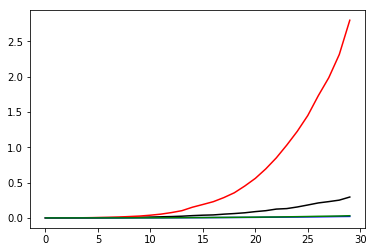

In [11]:
x = np.arange(30)
y = comp_densos(30)
a = np.array(y[0])          
b = np.array(y[1])           
c = np.array(y[2])            
d = np.array(y[3])        
plt.plot(x, a, 'k', b, 'r', c, 'b', d, 'g') #Dijstra negro, bellman rojo, floyd azul, bfs verde

<h3>6. Compare experimental de los algoritmos incluyendo Floyd-Warshall para grafos aleatorios dispersos ($\psi$ cercano a 0) variando linealmente los tamaños de $n$</h3>

In [12]:
def comp_dispersos(n):
    Dijsktra = []
    Bellman = []
    Floyd = []
    Bfs = []
    for i in range(2,n+2):

        g = randGraph(0.2,i,2,20)       #Se asumen grafos densos aquellos con un 20% de aristas
        
        tic = time.clock()
        try:
            fullDijkstra(g)
        except:
            toc = time.clock()
        toc = time.clock()
        Dijsktra.append(toc - tic)
        
        tic = time.clock()
        try:
            fullBellmanFord(g)
        except:
            toc = time.clock()
        toc = time.clock()
        Bellman.append(toc - tic)        
        
        tic = time.clock()
        FloydWarshall(graphToMatrix(g))
        toc = time.clock()
        Floyd.append(toc - tic)
        
        tic = time.clock()
        fullBFS_2(g)
        toc = time.clock()
        Bfs.append(toc - tic)
                
    res = [Dijsktra, Bellman, Floyd, Bfs]    
    return res

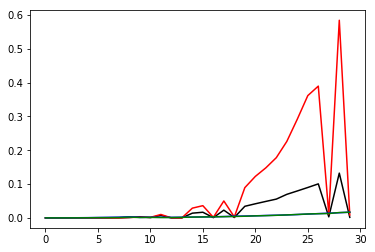

In [13]:
x = np.arange(30)
y = comp_dispersos(30)
a = np.array(y[0])          
b = np.array(y[1])           
c = np.array(y[2])            
d = np.array(y[3])        
plt.plot(x, a, 'k', b, 'r', c, 'b', d, 'g') #Dijstra negro, bellman rojo, floyd azul, bfs verde